1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [6]:
n = 10**4
arr = [1,2,3,5,10,20,50,100,500]

df = pd.DataFrame(columns=['d', 'min', 'mean', 'max', 'mean_nearest', 'max_nearest'])
for d in arr:
    X = np.random.uniform(0,1,(n,d))
    D = euclidean_distances(X, X)
    D = np.sort(D)
    D = D[:,1:]
    
    min_value = D.min()
    max_value = D.max()
    mean_value = D.mean()
    
    mean_nearest = np.amin(D,axis=1).mean()
    max_nearest = np.amin(D,axis=1).max()
  
    df = df.append({
        'd': d, 
        'min': min_value, 
        'mean': mean_value, 
        'max': max_value, 
        'mean_nearest': mean_nearest, 
        'max_nearest': max_nearest
    }, ignore_index=True)
df = df.astype({'d': 'int32'})

print(df)

     d           min      mean        max  mean_nearest  max_nearest
0    1  9.125060e-09  0.335280   0.999810      0.000050     0.000519
1    2  7.345879e-05  0.520102   1.409997      0.005040     0.018753
2    3  2.469690e-03  0.660299   1.666413      0.026161     0.067109
3    5  2.684940e-02  0.879804   1.989374      0.109409     0.222128
4   10  1.547094e-01  1.266477   2.466171      0.387627     0.605187
5   20  5.042815e-01  1.809002   3.029351      0.897457     1.216573
6   50  1.532027e+00  2.877296   4.165015      1.969209     2.301503
7  100  2.684460e+00  4.076069   5.347023      3.183656     3.532556
8  500  7.694222e+00  9.123948  10.405330      8.248003     8.630919


3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

100%|██████████| 6/6 [09:22<00:00, 93.74s/it] 


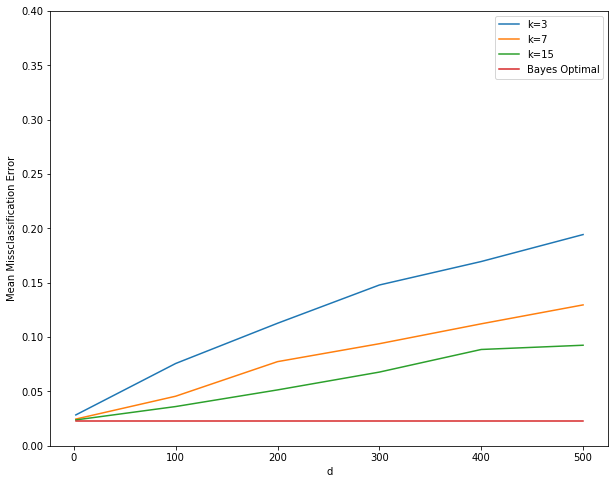

In [7]:
np.random.seed(42)
n = 10**4


fig, ax = plt.subplots(1,1, figsize=(10, 8))
plt.ylim([0, 0.4])
ax.set_xlabel('d')
ax.set_ylabel('Mean Missclassification Error')

arr_k = [3,7,15]
arr_d = [2,100,200,300,400,500]
for k in arr_k:
    res = []
    for d in tqdm(arr_d):
        a =[ 2.0/np.sqrt(d) for i in range(d)]
        XX=np.random.randn(n, d)
        X0 = XX + a
        X1 = XX - a
        Y = np.zeros((n, d))+np.random.randint(0,2,(n,1))
        X = X0*(Y==1) + X1*(Y==0)
        
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X, Y, cv=10)
        res.append(np.mean(1 - scores))
    ax.plot(arr_d, res, label='k='+str(k))
    ax.legend(loc=0)

ax.plot(arr_d, [0.023 for i in range(len(arr_d))], label='Bayes Optimal')
ax.legend(loc=0)